In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
#%matplotlib notebook
%matplotlib inline

In [22]:
# Read in the sample image
image = mpimg.imread('perception_course_sample.jpg')
#image = mpimg.imread('perception_sample.jpg')

In [23]:
# Helpers
def perspect_transform(img, src, dst):
    # get transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # keep the same input size
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    
    return warped

def color_thresh(img, rgb_thresh=(160, 160, 160)):
    """Applies the threshold for RGB:
       Assigns 1 where the threshold is exceeded.
       Returns a single channel binary image
    """
    color_select = np.zeros_like(img[:,:,0])
    
    color_thresh = (img[:,:,0] > rgb_thresh[0]) \
                    & (img[:,:,1] > rgb_thresh[1]) \
                    & (img[:,:,2] > rgb_thresh[2])
    
    color_select[color_thresh] = 1
    
    return color_select

# Define calibration box in source (actual) and destinatin (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5

# Set a bottom offset to account for the fact that the bottom of the image
# is not the position of the rover, but a bit in front of it
bottom_offset = 6

source = np.float32([[14,140], [301,140], [200,96], [118,96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                         [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                         ])

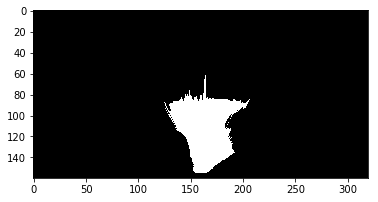

In [24]:
warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))

plt.imshow(colorsel, cmap='gray')
plt.show()

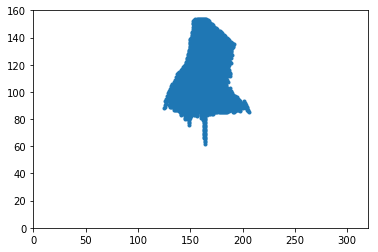

In [66]:
ypos, xpos = colorsel.nonzero()
# x, y, line-style format string
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show()

In [122]:
print(colorsel.nonzero())

(array([ 62,  63,  64, ..., 154, 154, 154]), array([164, 164, 164, ..., 163, 164, 165]))


In [147]:
def rover_coords(binary_img):
    # Extract xpos and ypos pixel positions from binary_img and
    # convert xpos and ypos to rover-centric coordinates
    ypos, xpos = binary_img.nonzero()
    
    ypx = -(xpos - binary_img.shape[1] / 2)
    xpx = -(ypos - binary_img.shape[0])
    
    return xpx, ypx

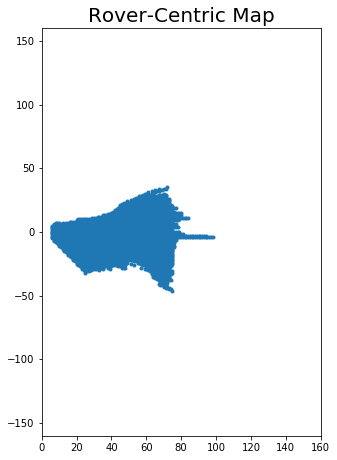

In [148]:
xpix, ypix = rover_coords(colorsel)

fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show()

### Comparison - before / after for better understanding

In [149]:
print(xpos, ypos)
print(ypix, xpix)

[164 164 164 ..., 163 164 165] [ 62  63  64 ..., 154 154 154]
[-4. -4. -4. ..., -3. -4. -5.] [98 97 96 ...,  6  6  6]


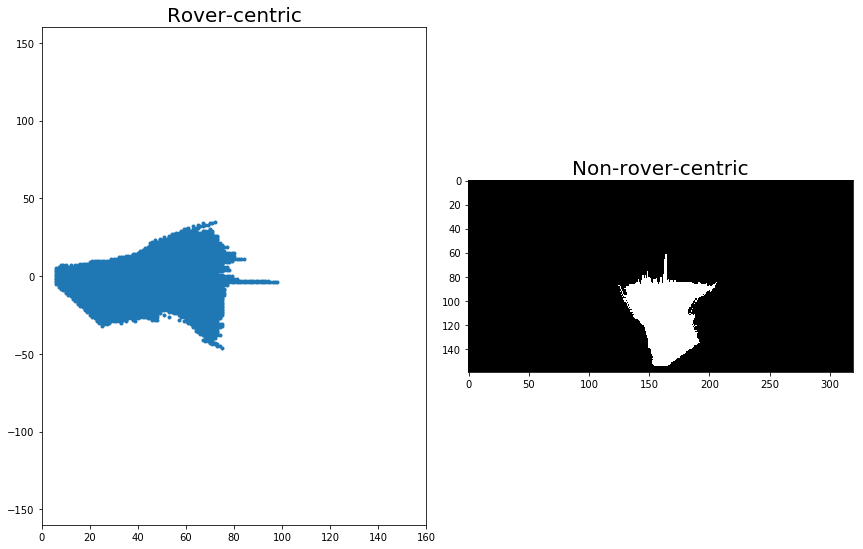

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7.5), sharey=False)
fig.tight_layout()
ax1.plot(xpix, ypix, '.')
ax1.set_ylim(-160, 160)
ax1.set_xlim(0, 160)
ax1.set_title('Rover-centric', fontsize=20)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Non-rover-centric', fontsize=20)
plt.show()